# The best neighborhood to live in Pittsburgh 
# By: Aiden McCoy, Aidan Krieger, and Trystin DeRemer

## Introduction

For our project, we wanted to find out what was the best neighborhood to live in Pittsburgh. To do this, we looked through 3 different data sets and combined the data in order to determine which one was best. 



## Dataset 1- Trystin DeRemer

My dataset is called Environmental Justice Areas Data. This dataset goes through all of the census tracts (subdivisions of counties) in Pittsburgh and shows whether or not it is an Environmental Justice Area. An Environmental Justice Area where at least 20 percent of the population lives in poverty. When trying to find the best neighborhood to live in Pittsburgh, we wanted to make sure it is not in an area where poverty is a big problem. The code below goes through the data set, filters out the Environmental Justice Areas, and prints a list of the census tracts which are not environmental justice areas. 

In [4]:
#EJ
import pandas as pd 

justiceTracts = pd.read_csv('acenvirojusticetracts.csv')
display(justiceTracts)

filteredData = justiceTracts[justiceTracts['EJ_Area'] == 0]

tractList = filteredData['TRACT'].tolist()

print(tractList)


,FID,TRACT,EJ_Area
0,0,20300,0
1,1,40400,1
2,2,70900,1
3,3,110200,1
4,4,140500,1
...,...,...,...
388,388,486700,1
389,389,504100,1
390,390,10300,1
391,391,50900,1


[20300, 190300, 270100, 402000, 411000, 417100, 428100, 431100, 405000, 407002, 412002, 415002, 419000, 425000, 426700, 427000, 429300, 430100, 434000, 439000, 449000, 451104, 451300, 453004, 458000, 459201, 468800, 472400, 473300, 474102, 475303, 475401, 476200, 480300, 484300, 487000, 488300, 488400, 488500, 488600, 490003, 490004, 491200, 495000, 496101, 496102, 516100, 521200, 521302, 521500, 523702, 525300, 526301, 560500, 563900, 980100, 980700, 310300, 446000, 469000, 473602, 60500, 140800, 141300, 191400, 191700, 241200, 270800, 290100, 281500, 423000, 482500, 494000, 507000, 80600, 80200, 141100, 417200, 460002, 468900, 480102, 515401, 981100, 490002, 516200, 464300, 465600, 472200, 564100, 474203, 70300, 140300, 151700, 191100, 320600, 406000, 410000, 413400, 418000, 420000, 429201, 430200, 450700, 455000, 459202, 471000, 472100, 473500, 475301, 478100, 501000, 521100, 525100, 526302, 564200, 982200, 451102, 451105, 452000, 453003, 456004, 457200, 459101, 459102, 461000, 4658

## Pie Chart

This pie chart shows the percentage of Census Tracts in Allegheny County that are an EJ Area as well as the percentage of those who aren't. The green shows the percentage of census tracts that will be used in our calculations.

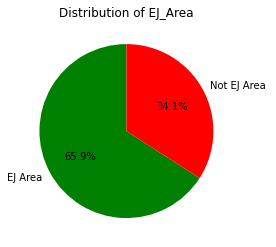

In [5]:
import matplotlib.pyplot as plt

ej0 = justiceTracts[justiceTracts['EJ_Area'] == 0]
ej1 = justiceTracts[justiceTracts['EJ_Area'] == 1]
labels = ['EJ Area', 'Not EJ Area ']
sizes = [len(ej0), len(ej1)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Distribution of EJ_Area')
plt.show()

## Dataset 2- Aiden McCoy

My dataset is called Allegheny County Walk Scores. This dataset assigns a walk score to every census tract in Allegheny County. Walk score measures the walkability of any address using a patented system developed by the Walk Score company. These walk scores give a good indication about how good the location is for each neighborhood. Having a convenient location is a very important factor when deciding where to live, so we used it as one of our main factors for determining the best neighborhood. The code above takes the dataset, sorts it by walkscore, and creates a new column ranking the census tracts by walk score

In [6]:
#Walk Score
import pandas as pd

walkScore = pd.read_csv('walkscorect.xls-walk-score-by-ct.csv')

walkScoreSorted = walkScore.sort_values(by='Walk Score', ascending=False)
walkScoreSorted['Walk Rank'] = range(1, 403)

display(walkScoreSorted)



,Census Tract,Walk Score,Walk Rank
1,20100,100,1
177,445500,97,2
16,70300,91,3
14,60300,91,4
20,70900,89,5
...,...,...,...
194,456003,2,398
121,409000,2,399
116,406000,0,400
189,452000,0,401


The code below creates a graph that shows the top 18 census tracts by Walk score.

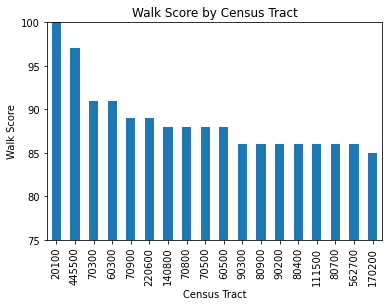

In [14]:
#Top Walk Scores by Census Tract

import matplotlib.pyplot as plt

walkScoreSorted80 = walkScoreSorted[walkScoreSorted["Walk Score"] >= 85]
walkScoreSorted80.plot(x="Census Tract", y="Walk Score", kind="bar", legend=False)
plt.title("Walk Score by Census Tract")
plt.xlabel("Census Tract")
plt.ylabel("Walk Score")
plt.ylim(75,100)
plt.show()


## Walk Score Conclusion

The area with the best Walk score was downtown Pittsburgh (20100), which makes sense, given that the inner city is more densely packed with things to do. Many of the other top walk scores were also located near the inner city. The top 3 census tracts for walkscore were as follows:


1. Census Tract 20100- Downtown Pittsburgh
2. Census Tract 445500- Sewickley
3. Census Tract 70300- Shadyside


## Dataset 3- Aidan Krieger

My dataset is called 'Housing Prices by Price Range 2021'. This dataset goes through every census tract in Allegheny County, takes the number of sales of 1-2 unit non condominium properties, and sorts them into price ranges. Housing prices are another very important factor when deciding where to live, so we used this as the final metric. The code above first reformats the census tract to match the other datasets. Then, it removes census tracts with less than 20 total houses, in order to eliminate outliers. Next, it finds the percentage of sales in each price range, and assigns a multiplier to each value. Then, it adds up these values to give each census tract a housing cost score. Finally, it sorts the data by score and creates a new column ranking the census tracts by score.

In [8]:
#Housing Costs
import pandas as pd
import numpy as np

housingCosts = pd.read_csv('housingpricebuckets2021.csv')
housingCosts = housingCosts.rename(columns={'Row Labels': 'Census Tract'})
housingCosts['Census Tract'] = housingCosts['Census Tract'] - 42003000000
filteredhousingCosts = housingCosts[housingCosts['Total'] > 20].copy()
display(filteredhousingCosts)
print("-------------------------------------------------------")
columnsForPercentage = filteredhousingCosts.columns[1:12]
i = 2.75
for column in columnsForPercentage:
    filteredhousingCosts[f'Percentage {column}'] = (filteredhousingCosts[column] / filteredhousingCosts['Total']) * 100 * i 
    i-=0.25
percentageHousingCosts = filteredhousingCosts[['Census Tract'] + [f'Percentage {column}' for column in columnsForPercentage]].copy()
percentageHousingCosts.loc[:, 'Housing Cost Score'] = percentageHousingCosts.iloc[:, 1:].sum(axis=1).copy()
display(percentageHousingCosts)
print("-------------------------------------------------------")
HouseScoreSorted = percentageHousingCosts.sort_values(by='Housing Cost Score', ascending=False)
HouseScoreSorted['House Rank'] = range(1,272)
HouseScoreSorted = HouseScoreSorted.drop(columns=[f'Percentage {column}' for column in columnsForPercentage[:]])                                        
display(HouseScoreSorted)

,Census Tract,Under $50K,$50K to $100K,$100K to $150K,$150K to $200K,$200K to $250K,$250K to $300K,$300K to $350K,$350K to $400K,$400K to $450K,$450K to $500K,Over $500K,Total
6,40900,1,3,4,3,8,4,1,0,0,0,0,24
8,50600,4,13,2,2,0,1,0,0,0,0,1,23
11,60300,0,2,3,7,3,4,0,4,5,2,13,43
17,70900,0,0,0,0,0,1,2,4,2,2,11,22
23,90100,0,2,3,6,5,4,3,3,1,2,2,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,563800,4,0,5,6,7,1,2,2,0,0,6,33
378,563900,8,15,13,15,4,1,0,0,0,0,0,56
379,564000,1,5,3,1,11,14,3,15,11,7,5,76
382,564400,12,22,21,11,2,2,0,0,0,0,0,70


-------------------------------------------------------


,Census Tract,Percentage Under $50K,Percentage $50K to $100K,Percentage $100K to $150K,Percentage $150K to $200K,Percentage $200K to $250K,Percentage $250K to $300K,Percentage $300K to $350K,Percentage $350K to $400K,Percentage $400K to $450K,Percentage $450K to $500K,Percentage Over $500K,Housing Cost Score
6,40900,11.458333,31.250000,37.500000,25.000000,58.333333,25.000000,5.208333,0.000000,0.000000,0.000000,0.000000,193.750000
8,50600,47.826087,141.304348,19.565217,17.391304,0.000000,6.521739,0.000000,0.000000,0.000000,0.000000,1.086957,233.695652
11,60300,0.000000,11.627907,15.697674,32.558140,12.209302,13.953488,0.000000,9.302326,8.720930,2.325581,7.558140,113.953488
17,70900,0.000000,0.000000,0.000000,0.000000,0.000000,6.818182,11.363636,18.181818,6.818182,4.545455,12.500000,60.227273
23,90100,0.000000,16.129032,21.774194,38.709677,28.225806,19.354839,12.096774,9.677419,2.419355,3.225806,1.612903,153.225806
...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,563800,33.333333,0.000000,34.090909,36.363636,37.121212,4.545455,7.575758,6.060606,0.000000,0.000000,4.545455,163.636364
378,563900,39.285714,66.964286,52.232143,53.571429,12.500000,2.678571,0.000000,0.000000,0.000000,0.000000,0.000000,227.232143
379,564000,3.618421,16.447368,8.881579,2.631579,25.328947,27.631579,4.934211,19.736842,10.855263,4.605263,1.644737,126.315789
382,564400,47.142857,78.571429,67.500000,31.428571,5.000000,4.285714,0.000000,0.000000,0.000000,0.000000,0.000000,233.928571


-------------------------------------------------------


,Census Tract,Housing Cost Score,House Rank
352,552300,275.000000,1
345,550900,271.590909,2
349,552000,271.000000,3
266,486900,268.181818,4
300,510000,267.708333,5
...,...,...,...
120,411000,69.675926,267
49,140400,62.500000,268
17,70900,60.227273,269
118,409000,58.461538,270


## House Score Conclusion

Using the housing percentages and multipliers to calculate house rank, I determined that the top three areas are the following:

1. Census Tract 552300
2. Census Tract 550900
3. Census Tract 552000

All three of these Census Tracts are bordering each other in East McKeesport, which is southeast of downtown Pittsburgh. This showed that based on the house score metric East Mckeesport is the best area for housing prices in Allegheny County

## Data Combination

The code above combines the 3 datasets together in order to get the final results. The code first merges the walk score data table and housing cost data table based on census tract. It then removes the tract numbers that only appeared on one of the datasets. It then averages out the ranks of the walk score and house score and sorts the average rank from lowest to highest. Finally, it removes the tract numbers of EJ areas from the first dataset.


In [9]:
import pandas as pd

mergedData = pd.merge(walkScoreSorted, HouseScoreSorted, on='Census Tract', how='inner')
walkScoreFiltered = walkScoreSorted[walkScoreSorted['Census Tract'].isin(mergedData['Census Tract'])]
HousingCostsFiltered = percentageHousingCosts[percentageHousingCosts['Census Tract'].isin(mergedData['Census Tract'])]
mergedData['Average Rank'] = mergedData[['Walk Rank', 'House Rank']].mean(axis=1)
mergedData = mergedData.sort_values(by='Average Rank', ascending=True)
mergedData = mergedData[mergedData['Census Tract'].isin(tractList)] 

display(mergedData)

,Census Tract,Walk Score,Walk Rank,Housing Cost Score,House Rank,Average Rank
32,290400,65,81,235.975610,59,70.0
55,484300,55,117,254.411765,28,72.5
46,320400,57,106,239.583333,48,77.0
29,191900,65,78,224.193548,78,78.0
9,472300,77,33,197.826087,132,82.5
...,...,...,...,...,...,...
244,411000,11,364,69.675926,267,315.5
268,456003,2,398,120.075758,238,318.0
259,412002,5,384,93.243243,257,320.5
258,422000,6,383,37.500000,271,327.0


## Average Rank by Every Census Tract
This is a boxplot that includes the average rank of all of the Census Tracts that have been given an average rank based on our metrics. The lower the line is on the graph the better it is to live in this area.  

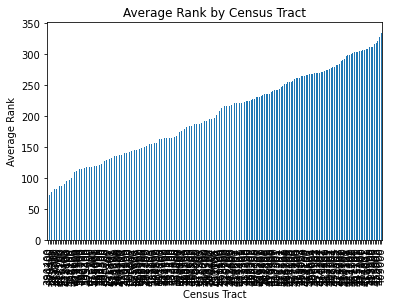

In [8]:
import matplotlib.pyplot as plt

mergedData.plot(x="Census Tract", y="Average Rank", kind="bar", legend=False)
plt.title("Average Rank by Census Tract")
plt.xlabel("Census Tract")
plt.ylabel("Average Rank")
plt.show()

## (Top Ranks)
This boxplot includes the same information as the one above, except it only shows the top 15 ranked census tracts.

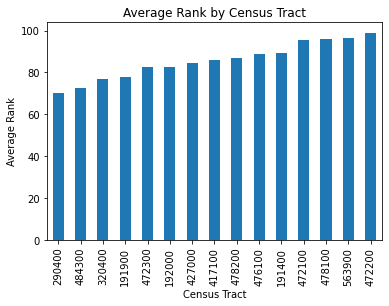

In [10]:
import matplotlib.pyplot as plt

mergedData100 = mergedData[mergedData["Average Rank"] <= 100]
mergedData100.plot(x="Census Tract", y="Average Rank", kind="bar", legend=False)
plt.title("Average Rank by Census Tract")
plt.xlabel("Census Tract")
plt.ylabel("Average Rank")
plt.show()

## Results

The Top 5 neighborhoods were as follows

1. Census tract 290400- North Brentwood
2. Census tract 484300- East Homestead
3. Census tract 320400- NorthWest Brentwood
4. Census tract 191900-East Dormont
5. Census tract 472300- South Dormont

## Conclusion

In conclusion, two neighborhoods stood out above the rest, which were Brentwood and Dormont. Each of these neighborhoods had 2 census tracts in the top 5 overall. This means that Brentwood is the best neighborhood to live in Pittsburgh, with Dormont being a close second.